#Text Summarization 
One of the most significant changes in information consumption has occurred in the ways that people obtain their information. It’s not possible spend a lot of time to thoroughly read an article, document, or book in order to determine its relevance, especially with the growth of the publishing industry. Text summarization is a challenging problem in machine learning and natural language processing, it’s a procedure in natural language processing (NLP) that involves condensing information from huge texts to make it easier to consume without losing any of the important information contained within it. It is critical that the summary is fluent, continuous, and accurately depicts the main points (2021).

One example of text summarization is to create a quick summary of a long news article, In reality, text summarizing algorithms are used by several news aggregator apps, including Google News, the inshorts app, and various other news aggregator apps.

When employing extraction-based summarizing, one of the most important responsibilities is to find key words in a text and use those phrases to locate significant information that should be included in the summary. In order to summarize a piece of writing, there are two primary methods that may be used, Extractive approach extract a subset of words, phrases, or sentences from the original text to create a summarized version of the content. On the other hand, Abstractive approach, depends on advanced natural language algorithms a semantic representation is first constructed, and then a summary is generated. Some words that were not stated in the original content may be included in a summary (Gudivada and Rao, 2018).

There are various techniques to summaries a document, number of journal papers are examined for this literature review.
Using sentence scoring to summarize a text goes back to 1958. There are three approaches are followed for a computer to determine which words in a document are most meaningful, this includes: word scoring, sentence scoring, and graph scoring.

Derek Miller from Georgia Institute of Technology published a paper with a project described as "lecture summarizing service," which is a python-based RESTful service that use the BERT model for text embeddings and K-Means clustering to locate sentences that are closest to the centroid for the purpose of selecting summary sentences. The process of creating summaries from saved lectures were as follow, the lecture summarization service engine used a pipeline that tokenized the incoming paragraph text into clean sentences, then passed those tokenized sentences to the BERT model for inference to output embeddings, and finally clustered the embeddings with K-Means, selecting the embedded sentences that were closest to the centroid as the candidate summary sentences(Miller, 2021).

T. Sri Rama Raju developed an automated text summarizing tool that recognizes the most frequently used words and phrases and rates them accordingly using using the Sentence Scoring Method (SSM). The most significant sentences have been condensed into a single paragraph for your convenience.
Singular and plural nouns, frequency, sentence location, cue words, and resemblance to the title are all taken into account when calculating a phrase's score. Summary sentences are chosen from among those of greatest rank, and no two consecutive sentences are picked for inclusion in the summary (Sri Rama Raju, 2017).

As technology advances, it is getting increasingly challenging to evaluate and comprehend textual files in this rapidly changing era. Reading through a mountain of information can be a time-consuming. Because of the amount of text data available, the usage of text summarizing techniques is necessitated by the massive amount of documents. 


In [ ]:
%%capture
!pip install bert-extractive-summarizer


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


In [ ]:
!unzip glove*.zip.1
#!unzip glove*.zip 'content/glove.6B.zip'

In [ ]:
!unzip glove*.zip
#!unzip glove*.zip 'content/glove.6B.zip'

In [ ]:
!ls
!pwd

In [ ]:
%%capture
!pip install contractions

In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
from transformers import logging #not to show error in bert 
logging.set_verbosity_error()
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from summarizer import Summarizer
import string 
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import contractions
import re


In [6]:


df_7news = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_news7.xlsx",  names=['','Title', 'Article','Category','URL','News Outlet']) 

df_theAge = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_theAge-2.xlsx", names=['','Title', 'Article','Category','URL','News Outlet']) 

df_thenewDaily = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_newDaily.xlsx", names=['','Title', 'Article','Category','URL','News Outlet']) 

 


In [7]:
#delete index column 
df_7news = df_7news.drop([''], axis=1)
df_theAge = df_theAge.drop([''], axis=1)
df_thenewDaily =df_thenewDaily.drop([''], axis=1)
# reset index and merge dataframe and delete row with replay data
df = pd.concat([df_7news,df_theAge,df_thenewDaily],ignore_index=True)
df = df[df.Article.str.contains("Replay") == False]


Inspect the data
We have 5 columns in our dataset We are only interested in the Article column as it contains the text of the articles.

In [12]:
df.head()

Title  ...                                    summarize_SBert
0  Bathurst 2021: Chaz Mostert secures pole with ...  ...  Walkinshaw Andretti United star Chaz Mostert h...
1  India v New Zealand: Ajaz Patel spins his way ...  ...  New Zealand spinner Ajaz Patel can’t believe h...
2  Ashes 2021: Justin Langer breaks silence on Ti...  ...  Justin Langer has kept the door open on Tim Pa...
3  Melbourne Storm NRL star Brandon Smith shopped...  ...  Brandon Smith may have played his last game fo...
4  Novak Djokovic swiped for ‘exhausting’ respons...  ...  Novak Djokovic is still uncertain whether he w...

[5 rows x 6 columns]

Inspect the most used words in all the articles

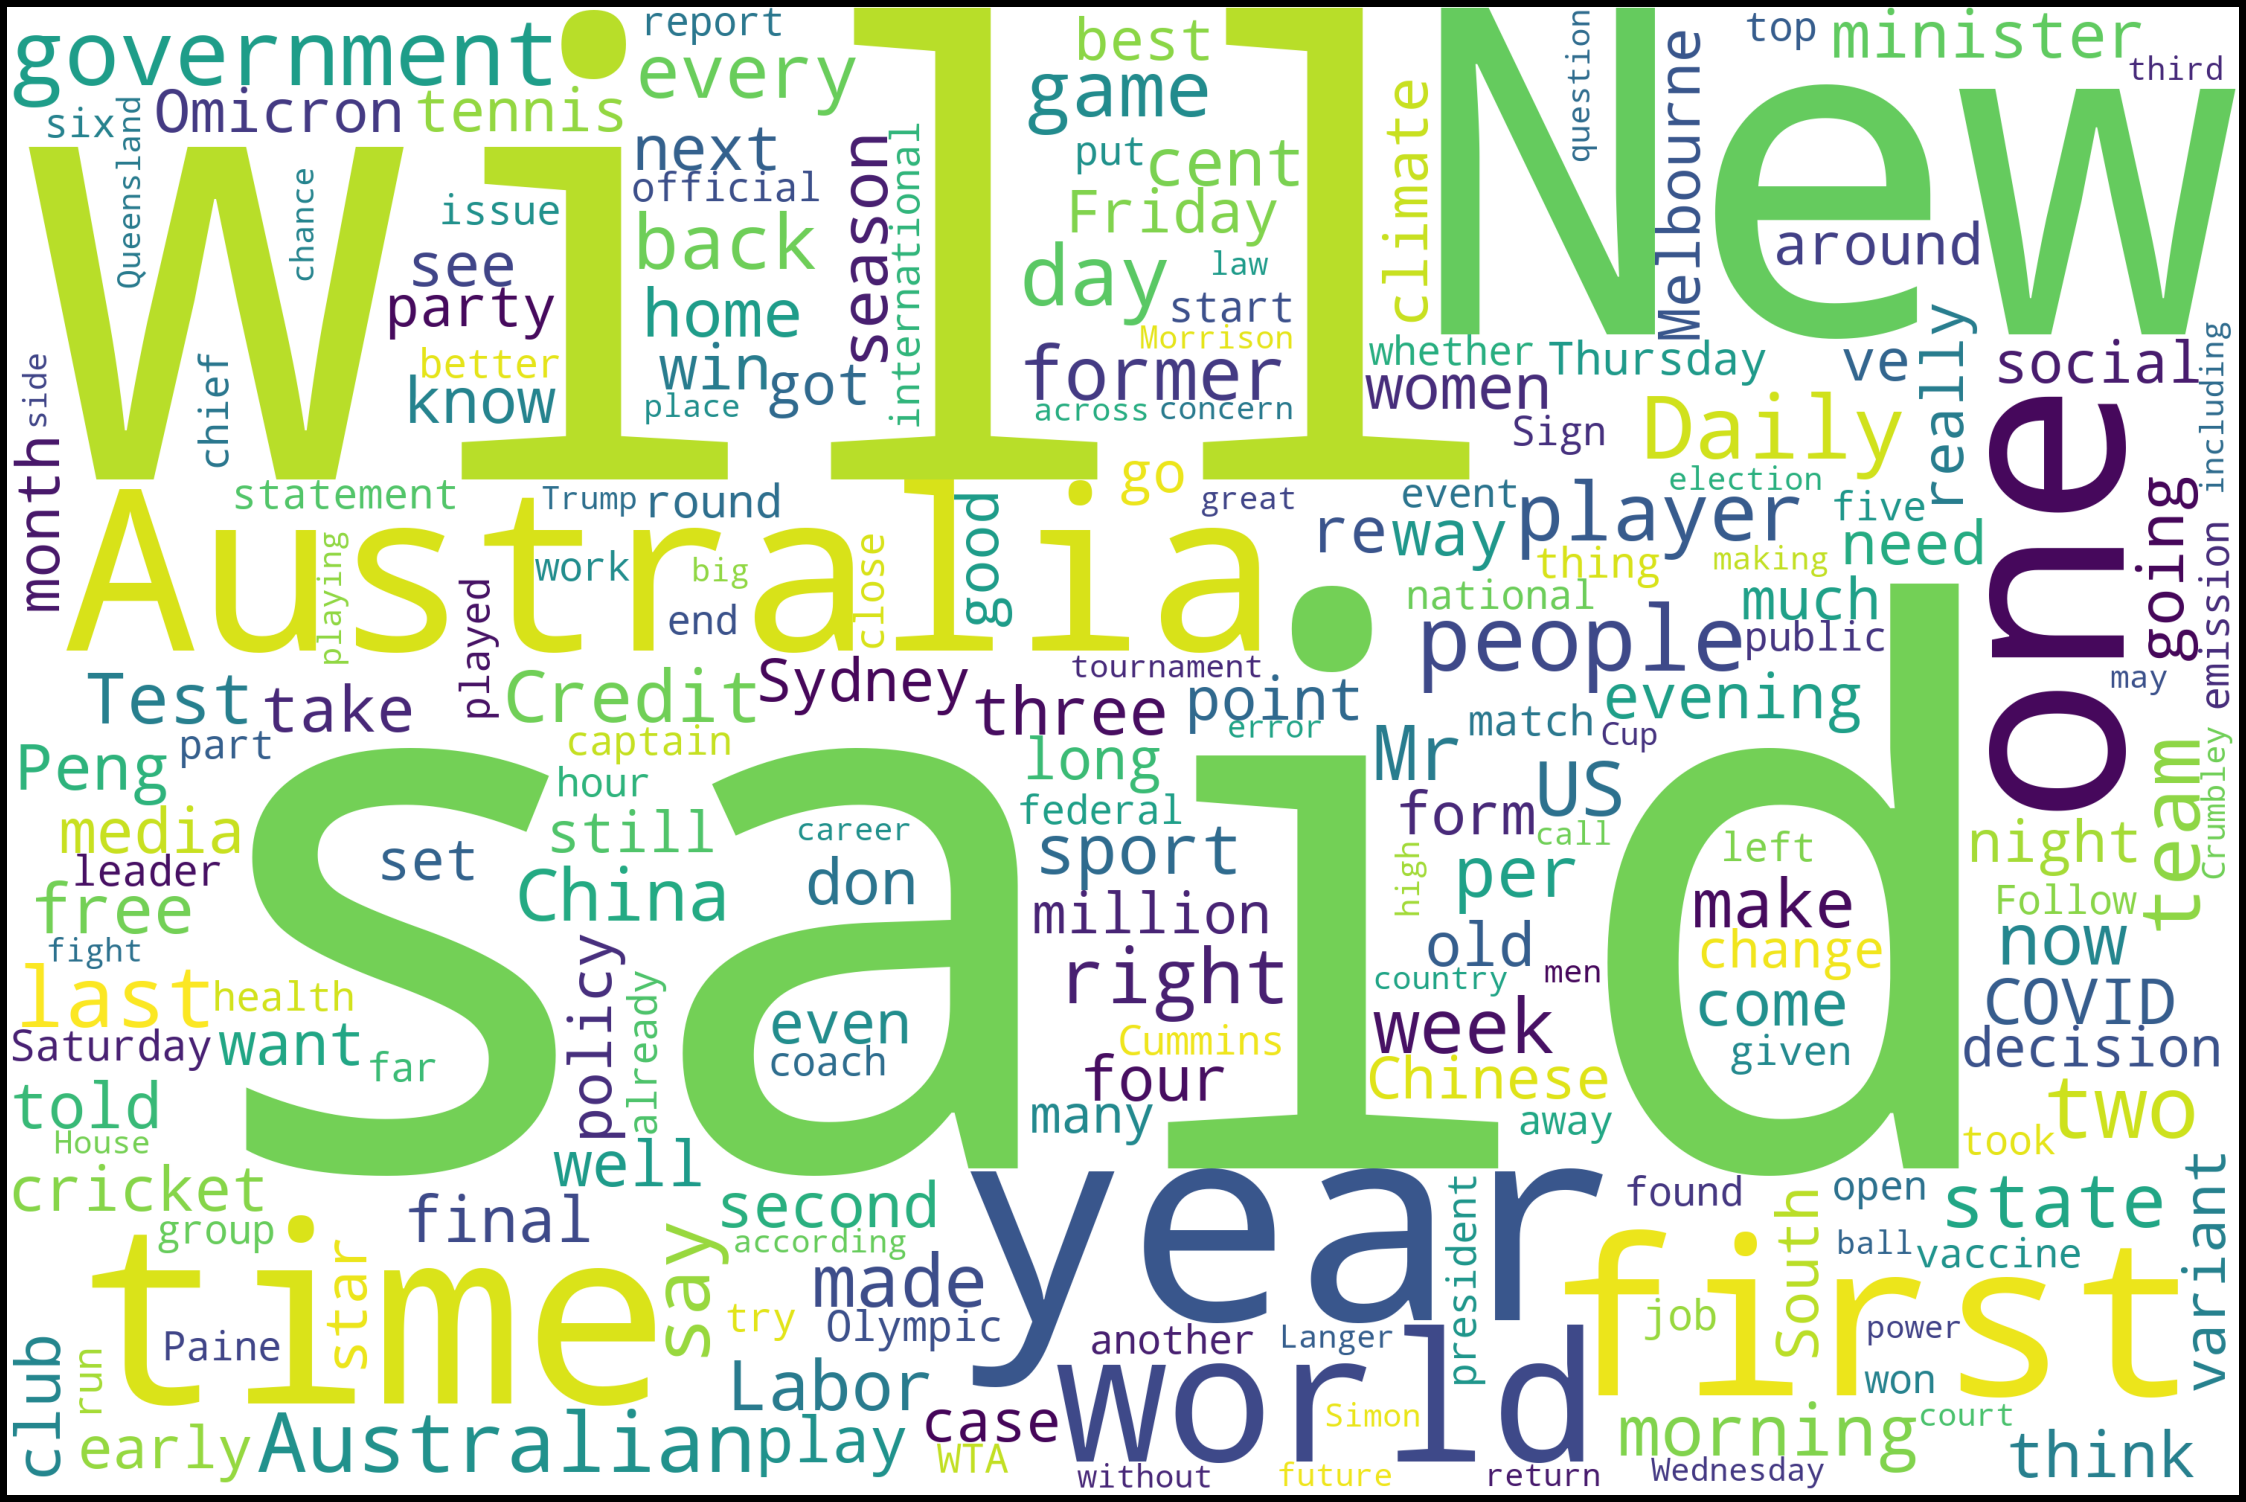

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = df['Article'].values 
#generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(str(text))

#draw and set the figure
plt.figure(figsize=(40, 30),facecolor='k')
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

For this project we obtain text extractive text summarization which relay on selecting important sentences, paragraphs. It is useful to compare texts using BERT, but the process take too long to execute. The primary reason for this is that BERT must analyze both phrases at the same time in order to determine similarity.

This is why we employ pre-trained SBERT (Sentence Bidirectional Encoder Representations from Transformers) a variant of BERT, a language model that has been effectively used in various NLP 
Sentence-BERT(SBERT) uses a Siamese network-like architecture to get two sentences as an input from two other sentences. They then go to BERT models and a pooling layer to make embeddings for these two sentences, which are then passed on to the models. Then, use the embeddings for the two sentences as inputs to figure out how similar they are to each other, and that's how you get the cosine measure (Karlsson, 2021). 


Pre-processing and cleaning methods weren't applied for the Article, Applting simple pre-process (remove stop words, comma question mark..etc) it resulted in an empty dataframe

In [ ]:
%%capture
!pip install -U sentence-transformers

In [15]:
from summarizer.sbert import SBertSummarizer
def summarise_news_sBert(text):
  model = SBertSummarizer('paraphrase-MiniLM-L6-v2')
  return  model(text, num_sentences=3)

In [24]:
df['summarize_SBert']= df['Article'].apply(summarise_news_sBert) #take 9min to excute 

In [ ]:
df['summarize_SBert']

As we can see from the world cloud there are not a lot of diffrenance in frequent words when using SBert compared to the orginal text

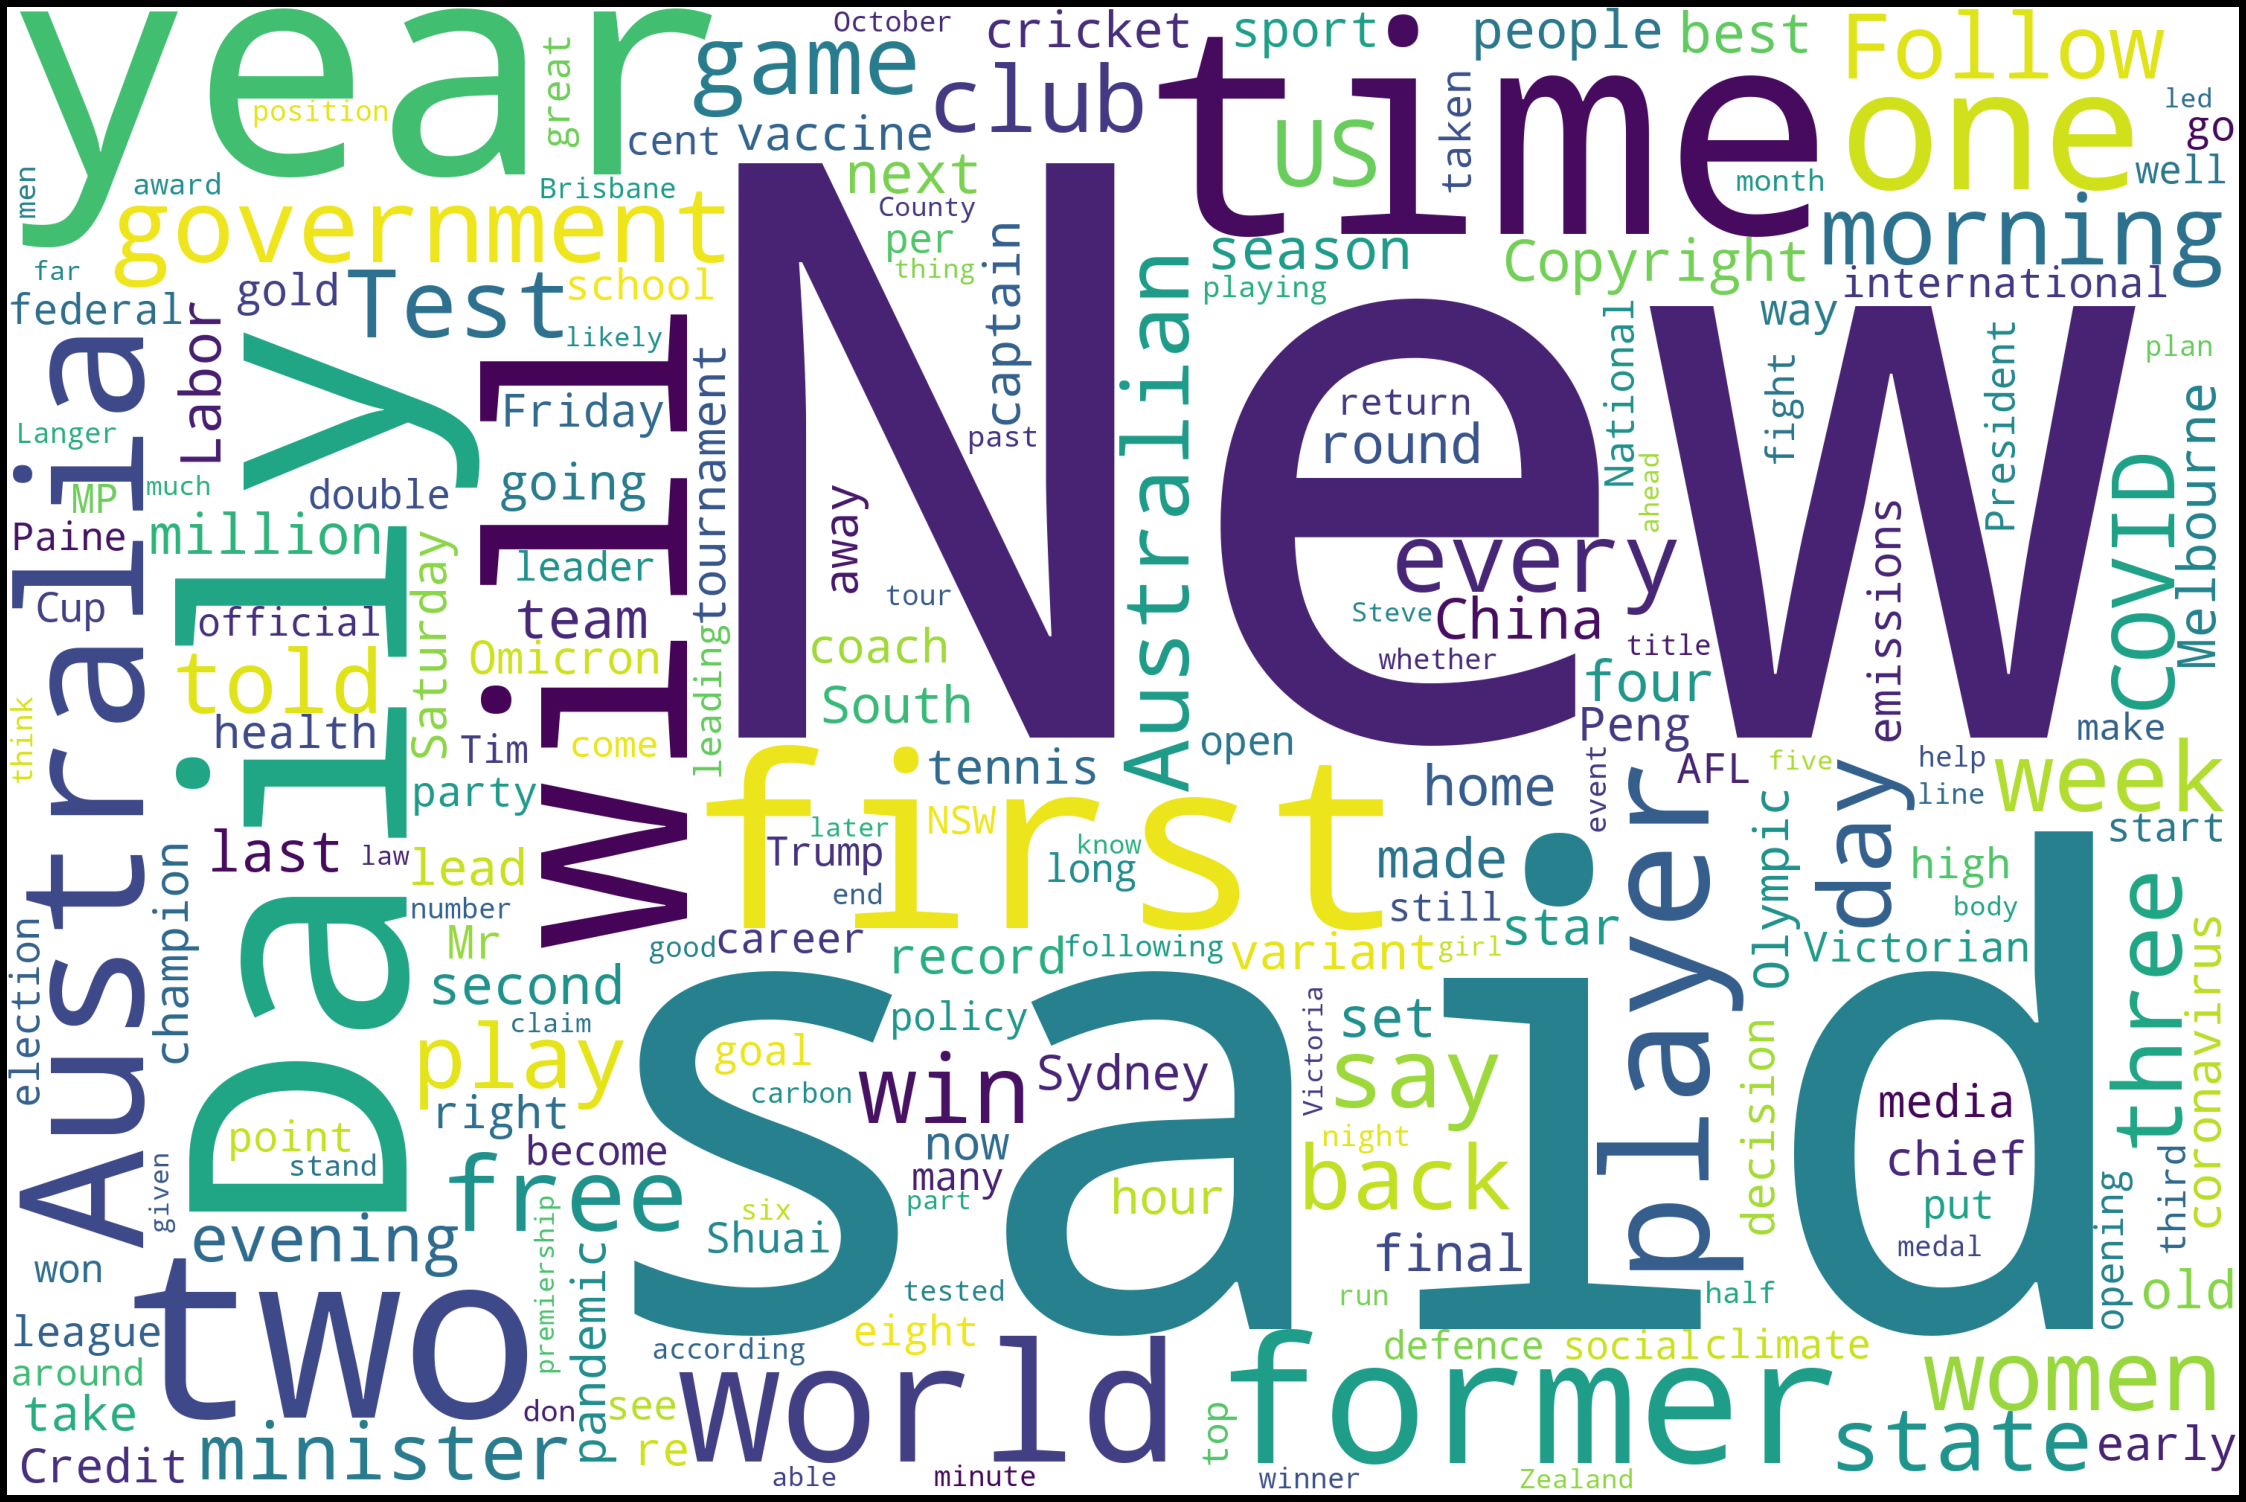

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text_summrise_bert = df['summarize_SBert'].values 
#generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(str(text_summrise_bert))

#draw and set the figure
plt.figure(figsize=(40, 30),facecolor='k')
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

#Using World Embaded

In addition to SBert, we will implement am unsupervised method using TextRank and similarity matrix.

Pre-processing and cleaning methods are applied for the Article column from the dataset before summarizing; the following measures were taken to ensure that the data was clean:

•	Removed URLs from the text

•	Removed stop words , expand the stop words to include months and news outlet name

•	Removed punctuation

•	Removed numbers 

•	Remove non-ascii characters

•	Removed unnecessary spaces 

•	Converting upper case to lower case. 

•	Expand the shortened words such as this’s or they’re


In [43]:
#load embaded
word_embeddings = {}

f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float')
    word_embeddings[word] = coefs
f.close()

We will need to normalise our data by transform our text into numerical data,we use the clean sentences to create vectors by using the GloVe word vectors. 

Word vectors arrange words into a neat vector space, where comparable words attract and disperse. Unlike Word2vec, GloVe includes global statistics (word co-occurrence) into word vectors rather than relying solely on local statistics (word context information).


Then by creating vectors for each of our sentences. A combined vector for the sentence will be constructed by first retrieving vectors for each of the sentence's constituent words and then taking the mean/average of those vectors.The cosine similarity approach will be used for this challenge to create a zero-dimensional matrix of dimensions.After that, create a networkx graph from the similarity matrix. Nodes and edges in indicate texts and similarity scores between sentences, respectively.



In [39]:
import numpy as np

In [39]:
def cleanup_sentences(text):
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    sentences_cleaned = []
    for sent in sentences:
        words = word_tokenize(sent)
        words = [i for i in words if i not in string.punctuation]
        words = [i for i in words if not i.lower() in stop_words]
        words = [i.lower() for i in words]
        sentences_cleaned.append(" ".join(words))
    return sentences_cleaned,sentences

def sent_vector(clean_sentences):
  sentence_vectors = []
  for i in clean_sentences:
    if len(i) != 0:
        vector = sum([word_embeddings.get(k, np.zeros((100,))) for k in i.split()])/(len(i.split())+0.001)
    else:
        vector = np.zeros((100,))
    sentence_vectors.append(vector)
  return sentence_vectors

def summarise_text(sentence_vectors,sentences):
  #Compute sentence similaritiy
  similarity_matrix = np.zeros([len(sentences), len(sentences)])
  for i in range(len(sentences)):
      for j in range(len(sentences)):
          if i != j:
              similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
  
  #Populate matrix
  similaritiy_graph = nx.from_numpy_matrix(similarity_matrix)
  scores = nx.pagerank(similaritiy_graph)
  
  #Ranking Sentance 
  ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
  #We will summrise text to 3 sentances 
  summarised_text = []
  for i in range(3):
      return ranked_sentences[i][1]

In [41]:
df['clean_Sent'], df['token_sentences'] = zip(*df['Article'].map(cleanup_sentences))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [44]:
df['vector_sent'] = df['clean_Sent'].apply(sent_vector)

In [45]:
df['vector_sent']

0      [[0.0006393600714184113, -0.053923486320116544...
1      [[-0.17421442882856675, 0.12976751331793968, 0...
2      [[-0.07588149135792785, 0.07654388388349134, 0...
3      [[-0.008461738060453314, 0.0374987401533823, 0...
4      [[-0.04377355835113146, 0.0864909186306342, 0....
                             ...                        
270    [[0.04805051373792145, 0.11359854844603824, 0....
271    [[0.00117124448356597, -0.04013855964934341, 0...
272    [[-0.07417173169779336, 0.09061192464833669, 0...
273    [[-0.14575241966180866, 0.04160047096470345, 0...
274    [[-0.11841867312585418, -0.08389055010499884, ...
Name: vector_sent, Length: 246, dtype: object

In [46]:
df['summarise_text'] = df.apply(lambda x: summarise_text(x['vector_sent'], x['token_sentences']), axis=1)


In [47]:
df.head()

Title  ...                                     summarise_text
0  Bathurst 2021: Chaz Mostert secures pole with ...  ...        Nick Percat/Dale Wood (Brad Jones Racing)8.
1  India v New Zealand: Ajaz Patel spins his way ...  ...  Humbled and fortunate to be in that company.”T...
2  Ashes 2021: Justin Langer breaks silence on Ti...  ...  That’ll be his decision.”Langer on Saturday wo...
3  Melbourne Storm NRL star Brandon Smith shopped...  ...  Brandon Smith may have played his last game fo...
4  Novak Djokovic swiped for ‘exhausting’ respons...  ...  I need some family time now and we’ll see what...

[5 rows x 11 columns]

Looking at the wordcloud in all three data (SBert, Rank and Orginal Data) there are not alot of differences in the most common used words, thus we can say that our summarisation method is working  

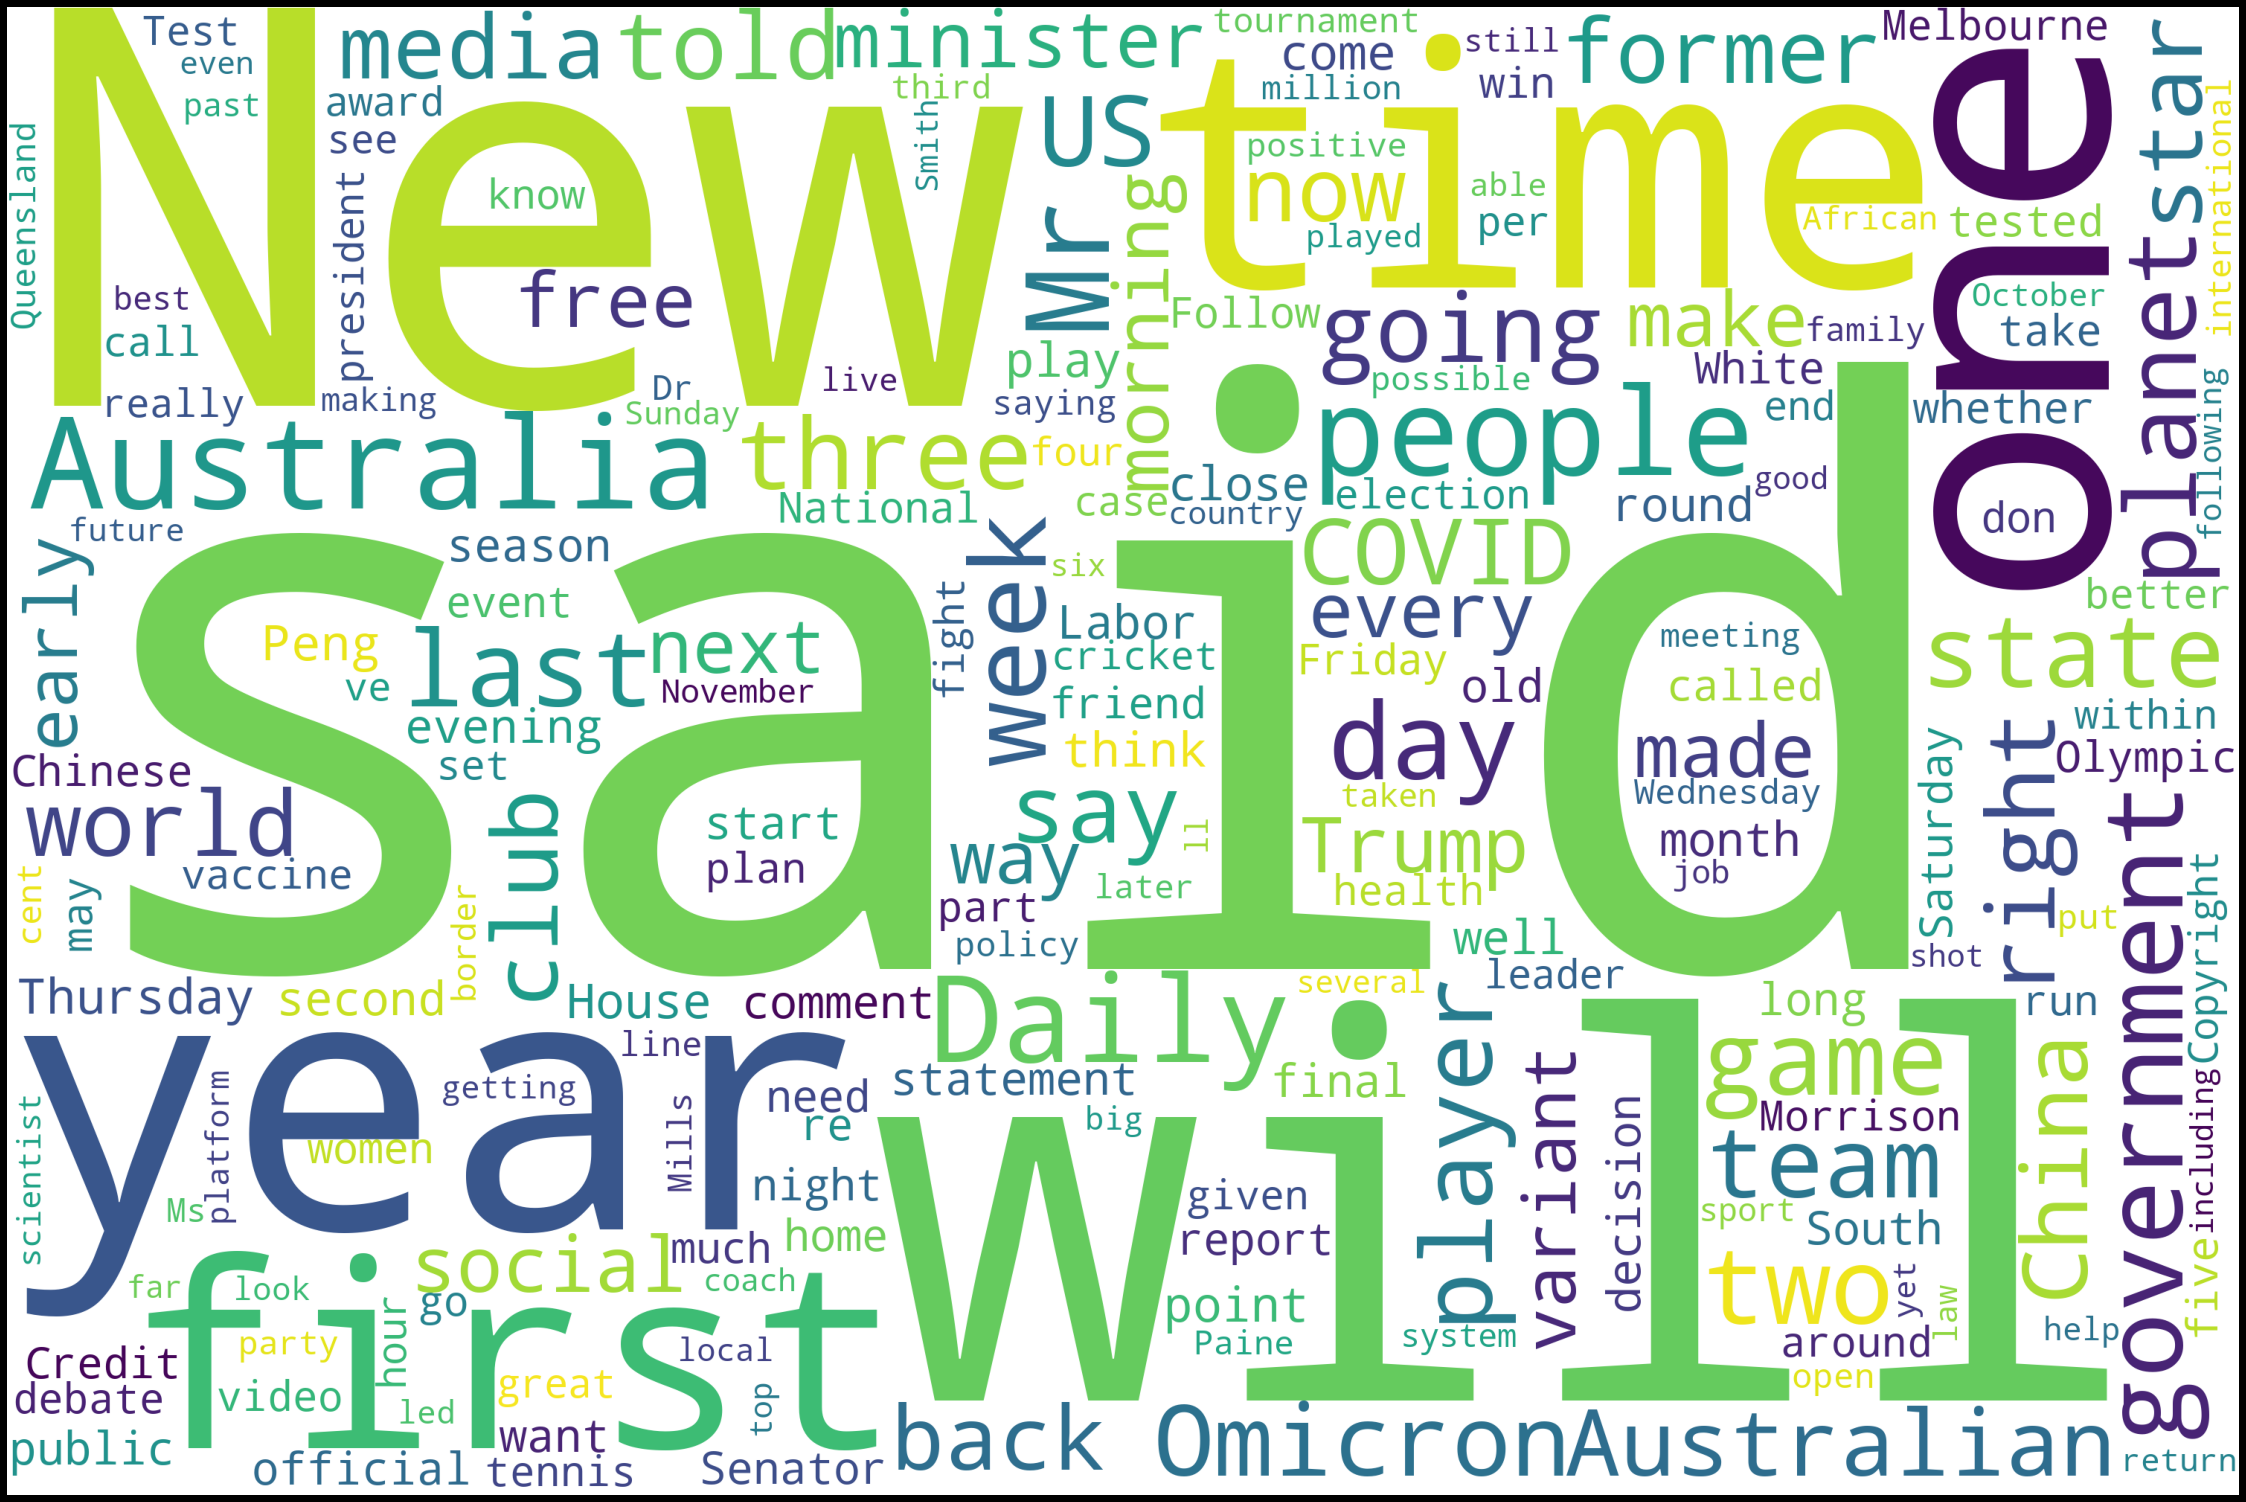

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text_summrise_bert = df['summarise_text'].values 
#generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(str(text_summrise_bert))

#draw and set the figure
plt.figure(figsize=(40, 30),facecolor='k')
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

#Seq2Seq for Training and Testing

For training and Testing our model we are deploying Karndeep Singh way of analuysing the data (it can be found [here](https://github.com/karndeepsingh/Custom_Text_Summarizer/blob/main/TRAIN_CUSTOM_NLP_TEXT_SUMMARIZER.ipynb)).
This method need high RAM, Google Colab might crash, to solve this we can connect to host runtime if our machine have high RAM

In [26]:
%%capture
!pip install transformers
!pip install simpletransformers


In [27]:
import pandas as pd
from simpletransformers.seq2seq import Seq2SeqModel,Seq2SeqArgs

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 10
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=False,
)


In [ ]:
from sklearn.model_selection import train_test_split

x_train ,x_test = train_test_split(df,test_size=0.5)   
data_x_train =x_train[['Article','summarize_SBert'] ]
data_x_test =x_test[['Article','summarize_SBert'] ]


train_df = pd.DataFrame(data_x_train)
train_df.rename(columns={'Article':'input_text'}, inplace=True)
train_df.rename(columns={'summarize_SBert':'target_text'}, inplace=True)

eval_df = pd.DataFrame(data_x_test)
eval_df.rename(columns={'Article':'input_text'}, inplace=True)
eval_df.rename(columns={'summarize_SBert':'target_text'}, inplace=True)

  


eval_df




In [32]:
def clean_text(text):
  expanded_words = []    
  stop_words = stopwords.words('english')
  stop_words.extend(['7news', 'the new daily'])
  for word in text.split():
    # using contractions.fix to expand the shotened words
    edit_text = contractions.fix(word)
    edit_text = re.sub('[,\.!?^]()', '',edit_text) #Remove punctuation
    edit_text = re.sub(r'http\S+', '', edit_text)
    edit_text = edit_text.lower()
    expanded_words.append(edit_text)                          
  
  expanded_text = ' '.join(expanded_words)
  expanded_text = expanded_text.encode('ascii',errors='ignore')
  expanded_text = expanded_text.decode("utf-8") #remove non-ascii characters python
  stop_words = stopwords.words('english')
  stop_words.extend(['7news', 'the new daily'])
  cleaned_summary = [w for w in expanded_text.split(',') if not w in stop_words]

  return ", ".join(cleaned_summary)


In [33]:
train_df['target_text'] = [clean_text(txt) for txt in train_df['target_text']]
train_df['input_text'] = [clean_text(txt) for txt in train_df['input_text']]

eval_df['target_text'] = [clean_text(txt) for txt in eval_df['target_text']]
eval_df['input_text'] = [clean_text(txt) for txt in eval_df['input_text']]

For training our data, we removed punctuations , convert letters to lower letters and expanding words to it's orginal. In the graph below we can see redauce number of sentances after cleaning our data. The process might take time depend on Disk and RAM

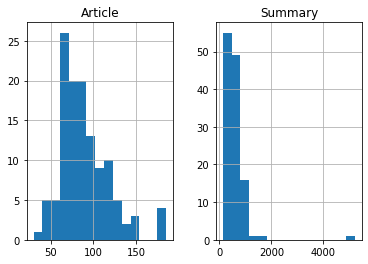

In [35]:
import matplotlib.pyplot as plt
article_count = []
summary_count = []

# populate the lists with sentence lengths
for i in train_df['target_text']:
      article_count.append(len(i.split()))

for i in train_df['input_text']:
      summary_count.append(len(i.split()))

length_df = pd.DataFrame({'Article':article_count, 'Summary':summary_count})
length_df.hist(bins = 15)
plt.show()

In [36]:
model.train_model(train_data = train_df,  eval_data = eval_df)

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

(160,
 {'eval_loss': [2.3453170731663704,
   2.204636551439762,
   2.2244321405887604,
   2.2306298166513443,
   2.3147699758410454,
   2.4048756808042526,
   2.467184394598007,
   2.5247106924653053,
   2.5442114397883415,
   2.5781652480363846],
  'global_step': [16, 32, 48, 64, 80, 96, 112, 128, 144, 160],
  'train_loss': [3.36091947555542,
   2.811779499053955,
   1.468386173248291,
   1.871158242225647,
   1.409401535987854,
   0.5186246633529663,
   0.9264533519744873,
   0.2668009400367737,
   0.7643135190010071,
   0.14824645221233368]})

This method tests a model on a validation set and returns metrics, the model's outputs, and a false positive in case the model was incorrect in its prediction
As we can notice our loss is at 20% which is good

In [37]:
#Evaluate the model
res = model.eval_model(eval_df)
print(res)

  0%|          | 0/123 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/16 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 2.5781652480363846}


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Copy of text_summarisation_FINAL.ipynb')

--2021-12-08 13:33:21--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-12-08 13:33:21 (22.0 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
